In [1]:
import random
import numpy as np

from keyrover.datasets.multiclass_dataset import *
from keyrover import *

from ultralytics import YOLO

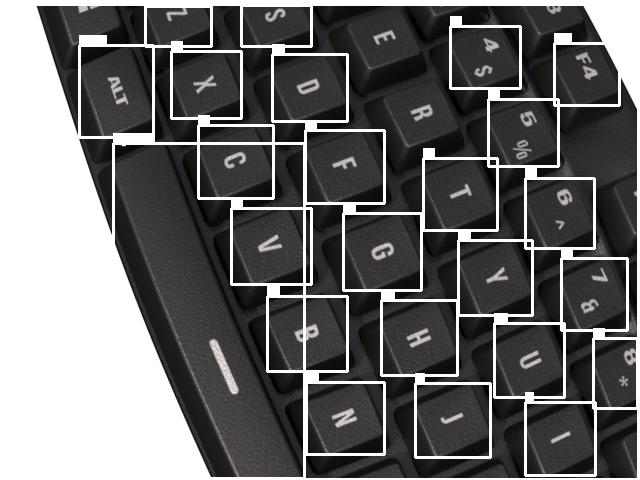

In [2]:
paths = os.listdir(f"{YOLO_MULTI_DATASET}/train/labels")
i = random.choice(paths)

img = Image.open(f"{YOLO_MULTI_DATASET}/train/images/{i.removesuffix('.txt')}.jpg")
img = np.array(img)

with open(f"{YOLO_MULTI_DATASET}/train/labels/{i}") as file:
    lines = file.readlines()

for line in lines:
    key, cx, cy, w, h = map(float, line.split())
    cx *= img.shape[1]
    cy *= img.shape[0]
    w = int(w * img.shape[1])
    h = int(h * img.shape[0])

    x1 = int(cx - w / 2)
    y1 = int(cy - h / 2)
    
    key = int(key) + 1
    text = id_to_key.get(key, str(key))
    draw_textbox(img, (x1, y1), (x1 + w, y1 + h), text, (255, 255, 255, 255), scale=1, thickness=0.25, size=0.4)

Image.fromarray(img)

In [3]:
model = YOLO("yolo11n.pt")
model = YOLO("models/yolo-multiclass/train19/weights/last.pt")

In [4]:
results = model.train(data=f"{YOLO_MULTI_DATASET}/data.yaml", time=7.5, patience=10, batch=32, fraction=0.25,
                      single_cls=False, resume=True,
                      cache=True, verbose=True, device="mps", plots=True, project="models/yolo-multiclass")

New https://pypi.org/project/ultralytics/8.3.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.25 🚀 Python-3.11.1 torch-2.5.0 MPS (Apple M1 Max)
engine/trainer: task=detect, mode=train, model=models/yolo-multiclass/train19/weights/last.pt, data=datasets/yolo-multiclass/data.yaml, epochs=97, time=7.5, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=mps, workers=0, project=models/yolo-multiclass, name=train19, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=models/yolo-multiclass/train19/weights/last.pt, amp=True, fraction=0.25, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agno

train: Scanning /Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/datasets/yolo-multiclass/train/labels.cache... 872 images, 0 backgrounds, 1 corrupt: 100%|██████████| 872/872 [00:00<?, ?it/s]

train: WARNING ⚠️ /Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/datasets/yolo-multiclass/train/images/1689.jpg: ignoring corrupt image/label: Label class 95 exceeds dataset class count 88. Possible class labels are 0-87
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



train: Caching images (0.7GB RAM): 100%|██████████| 871/871 [00:00<00:00, 1954.05it/s]
val: Scanning /Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/datasets/yolo-multiclass/valid/labels.cache... 410 images, 0 backgrounds, 0 corrupt: 100%|██████████| 410/410 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.4GB RAM): 100%|██████████| 410/410 [00:00<00:00, 1978.41it/s]


Plotting labels to models/yolo-multiclass/train19/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000109, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Resuming training models/yolo-multiclass/train19/weights/last.pt from epoch 6 to 97 total epochs
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to models/yolo-multiclass/train19
Starting training for 7.5 hours...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/28 [00:00<?, ?it/s]/Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/.venv/lib/python3.11/site-packages/ultralytics/utils/tal.py:113: UserWarning: MPS: nonzero op is not natively supported for the provided input on MacOS14Falling back on CPU. This may have performance implications.See github.com/pytorch/pytorch/issues/122916 for further info (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/Indexing.mm:309.)
  bbox_scores[mask_gt] = pd_scores[ind[0], :, ind[1]][mask_gt]  # b, max_num_obj, h*w
       6/97      29.1G     0.6991      4.475     0.8422        638        640: 100%|██████████| 28/28 [01:26<00:00,  3.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:30<03:03, 30.57s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:47<01:53, 22.70s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [01:03<01:17, 19.33s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [01:19<00:54, 18.02s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:31<00:32, 16.10s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:42<00:14, 14.13s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:56<00:00, 16.66s/it]


                   all        410      22704     0.0218     0.0125     0.0129     0.0113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/132      30.2G     0.6565      4.164     0.8373        409        640: 100%|██████████| 28/28 [02:34<00:00,  5.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:10<01:00, 10.17s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:19<00:47,  9.58s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:28<00:36,  9.22s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:37<00:28,  9.46s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [00:47<00:18,  9.49s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [00:56<00:09,  9.40s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:03<00:00,  9.05s/it]


                   all        410      22704     0.0239     0.0108     0.0144     0.0131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/126      30.6G     0.6475      3.878     0.8355        850        640: 100%|██████████| 28/28 [03:27<00:00,  7.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:09<00:59,  9.83s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:19<00:49,  9.89s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:29<00:39,  9.75s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:39<00:29,  9.75s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [00:49<00:19,  9.81s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [00:58<00:09,  9.77s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:05<00:00,  9.41s/it]


                   all        410      22704     0.0308     0.0096     0.0176      0.016

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/115      30.6G     0.6342      3.617     0.8321        613        640: 100%|██████████| 28/28 [03:38<00:00,  7.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:10<01:03, 10.58s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:21<00:54, 10.87s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:32<00:43, 10.96s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:43<00:32, 10.90s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [00:54<00:21, 10.80s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:04<00:10, 10.54s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:12<00:00, 10.34s/it]


                   all        410      22704     0.0364     0.0114     0.0206      0.019

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/108      28.4G     0.6224      3.424     0.8308        652        640: 100%|██████████| 28/28 [04:50<00:00, 10.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:12<01:17, 12.98s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:25<01:03, 12.69s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:38<00:50, 12.72s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:49<00:36, 12.09s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:01<00:24, 12.24s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:13<00:12, 12.12s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:23<00:00, 11.95s/it]


                   all        410      22704     0.0484       0.01     0.0263     0.0242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/98      33.5G     0.5992      3.245      0.829        640        640: 100%|██████████| 28/28 [05:01<00:00, 10.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:13<01:22, 13.74s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:26<01:05, 13.07s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:38<00:51, 12.86s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:50<00:37, 12.48s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:04<00:25, 12.86s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:16<00:12, 12.51s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:26<00:00, 12.34s/it]

                   all        410      22704     0.0498      0.012     0.0276     0.0255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/91      29.2G     0.5897      3.145     0.8263        560        640: 100%|██████████| 28/28 [04:45<00:00, 10.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:14<01:26, 14.34s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:27<01:07, 13.52s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:39<00:51, 12.97s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:51<00:37, 12.39s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:02<00:24, 12.00s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:14<00:12, 12.12s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:25<00:00, 12.23s/it]


                   all        410      22704     0.0572     0.0123     0.0314     0.0289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/88      29.2G     0.5779      3.021     0.8254        578        640: 100%|██████████| 28/28 [05:25<00:00, 11.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:12<01:17, 13.00s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:25<01:03, 12.77s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:37<00:49, 12.48s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:50<00:37, 12.65s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:04<00:26, 13.01s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:16<00:12, 12.73s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:28<00:00, 12.67s/it]


                   all        410      22704     0.0768     0.0137     0.0417     0.0381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/84      31.3G     0.5615      2.915     0.8225        726        640: 100%|██████████| 28/28 [05:15<00:00, 11.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:15<01:34, 15.71s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:27<01:07, 13.45s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:35<00:42, 10.74s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:49<00:36, 12.20s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [00:57<00:21, 10.62s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:11<00:11, 11.87s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:18<00:00, 11.25s/it]


                   all        410      22704     0.0897     0.0156     0.0489     0.0451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/82      26.6G     0.5624      2.838     0.8244        537        640: 100%|██████████| 28/28 [05:05<00:00, 10.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:10<01:03, 10.61s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:20<00:50, 10.13s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:35<00:49, 12.26s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:45<00:34, 11.45s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [00:59<00:25, 12.57s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:08<00:11, 11.28s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:15<00:00, 10.73s/it]

                   all        410      22704     0.0926     0.0201     0.0514     0.0473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      32.3G     0.5612      2.767     0.8221        632        640: 100%|██████████| 28/28 [05:54<00:00, 12.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:15<01:35, 15.92s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:28<01:09, 13.97s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:43<00:57, 14.47s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:58<00:44, 14.81s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:11<00:28, 14.08s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:25<00:14, 14.01s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:33<00:00, 13.31s/it]


                   all        410      22704      0.103     0.0199     0.0566     0.0524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/78      27.1G     0.5461      2.673     0.8216        763        640: 100%|██████████| 28/28 [06:19<00:00, 13.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:18<01:50, 18.48s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:33<01:21, 16.28s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:42<00:53, 13.26s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:59<00:43, 14.47s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:16<00:31, 15.57s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:25<00:13, 13.42s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:41<00:00, 14.46s/it]


                   all        410      22704      0.106     0.0153     0.0576      0.053

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75      30.5G     0.5487      2.595     0.8214        608        640: 100%|██████████| 28/28 [07:00<00:00, 15.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:12<01:14, 12.37s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:21<00:53, 10.68s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:38<00:53, 13.46s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:48<00:36, 12.07s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:06<00:28, 14.14s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:23<00:15, 15.07s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:37<00:00, 13.98s/it]


                   all        410      22704      0.116     0.0186     0.0637     0.0591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/73      25.6G     0.5327      2.532     0.8191        702        640: 100%|██████████| 28/28 [07:23<00:00, 15.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:13<01:22, 13.76s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:30<01:17, 15.45s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:47<01:04, 16.04s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:55<00:39, 13.10s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:12<00:28, 14.43s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:20<00:12, 12.32s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:38<00:00, 14.10s/it]


                   all        410      22704      0.128     0.0207     0.0707     0.0647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      33.8G     0.5504      2.473       0.82        752        640: 100%|██████████| 28/28 [07:25<00:00, 15.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:21<02:08, 21.43s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:32<01:15, 15.06s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:49<01:04, 16.03s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [01:06<00:49, 16.62s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:24<00:33, 16.87s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:42<00:17, 17.37s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:57<00:00, 16.84s/it]

                   all        410      22704      0.138     0.0199     0.0756       0.07



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/68        30G     0.5378      2.393     0.8207        945        640: 100%|██████████| 28/28 [07:29<00:00, 16.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:18<01:49, 18.24s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:33<01:22, 16.59s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:52<01:10, 17.51s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [01:11<00:54, 18.13s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:30<00:36, 18.34s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:48<00:18, 18.24s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:56<00:00, 16.67s/it]

                   all        410      22704      0.146     0.0208     0.0805      0.075



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/66      31.7G     0.5202      2.341     0.8179        421        640: 100%|██████████| 28/28 [07:15<00:00, 15.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:22<02:15, 22.53s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:37<01:29, 17.99s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:55<01:12, 18.13s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [01:08<00:47, 16.00s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:27<00:34, 17.01s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:38<00:14, 14.94s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:46<00:00, 15.21s/it]

                   all        410      22704       0.15     0.0215     0.0835     0.0779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/65      32.6G     0.5196       2.29     0.8183        640        640: 100%|██████████| 28/28 [07:14<00:00, 15.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:13<01:18, 13.01s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:32<01:25, 17.01s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:44<00:58, 14.71s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:53<00:37, 12.53s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:04<00:23, 11.85s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:13<00:10, 10.71s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:29<00:00, 12.73s/it]

                   all        410      22704      0.156      0.023     0.0869     0.0814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/64      30.5G     0.5233      2.227     0.8173        716        640: 100%|██████████| 28/28 [07:49<00:00, 16.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:19<01:57, 19.61s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:30<01:13, 14.74s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:55<01:16, 19.01s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [01:11<00:53, 17.82s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:24<00:32, 16.22s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:36<00:14, 14.83s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:45<00:00, 15.11s/it]


                   all        410      22704      0.174     0.0252     0.0975     0.0901

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/62      34.5G     0.5174      2.154     0.8179        517        640: 100%|██████████| 28/28 [07:56<00:00, 17.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:11<01:06, 11.05s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:27<01:11, 14.38s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:46<01:05, 16.43s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:59<00:44, 14.99s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:10<00:27, 13.57s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:27<00:14, 14.62s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:36<00:00, 13.72s/it]

                   all        410      22704      0.177     0.0249      0.099     0.0924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/61      31.5G     0.5185      2.116     0.8172        408        640: 100%|██████████| 28/28 [07:42<00:00, 16.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:18<01:49, 18.22s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:33<01:22, 16.48s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:48<01:03, 15.97s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [01:01<00:44, 14.73s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:17<00:29, 14.96s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:37<00:16, 16.73s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:46<00:00, 15.19s/it]


                   all        410      22704      0.188     0.0194      0.103      0.094

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/61      28.6G     0.5111      2.069     0.8152        491        640: 100%|██████████| 28/28 [07:26<00:00, 15.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:21<02:09, 21.53s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:37<01:30, 18.02s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:45<00:53, 13.45s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:54<00:35, 11.93s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:14<00:29, 14.65s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:29<00:14, 14.94s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:45<00:00, 15.12s/it]


                   all        410      22704      0.179     0.0199     0.0982     0.0916

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      28.5G     0.5076      2.025     0.8145        652        640: 100%|██████████| 28/28 [08:47<00:00, 18.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:19<01:54, 19.00s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:29<01:10, 14.18s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:46<01:01, 15.48s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:58<00:41, 13.82s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:05<00:23, 11.63s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:21<00:12, 12.93s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:30<00:00, 12.92s/it]


                   all        410      22704      0.188       0.02      0.104     0.0973

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/59      29.1G     0.5011      1.974     0.8156        514        640: 100%|██████████| 28/28 [07:59<00:00, 17.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:22<02:16, 22.78s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:38<01:32, 18.56s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:49<01:01, 15.29s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [01:06<00:46, 15.66s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:26<00:34, 17.45s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:42<00:16, 16.88s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:51<00:00, 15.98s/it]


                   all        410      22704       0.19     0.0209      0.106      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/58      32.1G     0.5072      1.947     0.8147        812        640: 100%|██████████| 28/28 [08:31<00:00, 18.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:21<02:11, 21.96s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:43<01:48, 21.62s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [01:00<01:17, 19.48s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [01:11<00:49, 16.34s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:31<00:34, 17.42s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:50<00:18, 18.17s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [02:09<00:00, 18.44s/it]


                   all        410      22704      0.182     0.0249      0.104     0.0974

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/57      28.2G     0.4937      1.893      0.814        951        640: 100%|██████████| 28/28 [08:19<00:00, 17.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:11<01:06, 11.07s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:27<01:10, 14.16s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:39<00:53, 13.31s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:48<00:34, 11.37s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:06<00:27, 13.91s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:13<00:11, 11.68s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:22<00:00, 11.81s/it]


                   all        410      22704       0.19     0.0197      0.107      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/57      27.1G     0.4964       1.85     0.8148        571        640: 100%|██████████| 28/28 [08:26<00:00, 18.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:21<02:09, 21.53s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:29<01:06, 13.29s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:49<01:06, 16.75s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [01:10<00:54, 18.21s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:18<00:29, 14.60s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:28<00:13, 13.00s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:38<00:00, 14.05s/it]


                   all        410      22704       0.22     0.0266      0.124      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/56      29.9G      0.495      1.824     0.8149        666        640: 100%|██████████| 28/28 [08:58<00:00, 19.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:15<01:32, 15.36s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:32<01:23, 16.69s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:41<00:51, 12.79s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:49<00:32, 10.91s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [00:57<00:19,  9.91s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:05<00:09,  9.19s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:15<00:00, 10.73s/it]


                   all        410      22704      0.179     0.0162     0.0984     0.0933

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/55      28.6G     0.4956      1.787     0.8151        564        640: 100%|██████████| 28/28 [08:24<00:00, 18.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:16<01:36, 16.06s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:33<01:23, 16.65s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:54<01:14, 18.66s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [01:02<00:43, 14.53s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:21<00:32, 16.32s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:29<00:13, 13.39s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:39<00:00, 14.26s/it]

                   all        410      22704       0.19     0.0217      0.108      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/55      28.2G     0.4868      1.763     0.8117        801        640: 100%|██████████| 28/28 [08:53<00:00, 19.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:20<02:03, 20.66s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:41<01:44, 20.87s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:50<01:00, 15.17s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:59<00:39, 13.09s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:13<00:26, 13.35s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:30<00:14, 14.63s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:48<00:00, 15.45s/it]


                   all        410      22704      0.167     0.0174      0.095     0.0908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/54      30.8G     0.4853      1.722     0.8126        432        640: 100%|██████████| 28/28 [08:49<00:00, 18.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:17<01:45, 17.66s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:39<01:39, 19.99s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:47<00:59, 14.82s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [01:08<00:51, 17.24s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:20<00:30, 15.12s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:27<00:12, 12.53s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:49<00:00, 15.69s/it]


                   all        410      22704      0.188     0.0149      0.103      0.098

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/54        29G      0.484      1.697     0.8123        481        640: 100%|██████████| 28/28 [10:40<00:00, 22.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:14<01:26, 14.50s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:23<00:54, 11.00s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:34<00:44, 11.18s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [00:42<00:30, 10.04s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:04<00:28, 14.14s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:14<00:12, 12.84s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:28<00:00, 12.66s/it]

                   all        410      22704      0.209      0.015      0.105     0.0987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/53      29.8G      0.484      1.668     0.8144        320        640: 100%|██████████| 28/28 [11:47<00:00, 25.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:13<01:19, 13.27s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:21<00:51, 10.21s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:43<01:02, 15.64s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [01:08<00:57, 19.21s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:29<00:40, 20.12s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:53<00:21, 21.47s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [02:08<00:00, 18.36s/it]

                   all        410      22704      0.186     0.0149      0.103      0.097



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/52      29.8G     0.4862      1.646     0.8118        459        640: 100%|██████████| 28/28 [12:10<00:00, 26.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:15<01:31, 15.28s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:28<01:11, 14.31s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:50<01:11, 17.77s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [01:12<00:57, 19.32s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:24<00:33, 16.55s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:34<00:14, 14.58s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:46<00:00, 15.20s/it]

                   all        410      22704      0.216      0.015      0.105     0.0996



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/51      29.9G     0.4765      1.629     0.8114        619        640: 100%|██████████| 28/28 [11:18<00:00, 24.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:27<02:42, 27.07s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:40<01:33, 18.76s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:54<01:06, 16.72s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [01:08<00:46, 15.54s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:33<00:38, 19.10s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [02:01<00:22, 22.13s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [02:15<00:00, 19.31s/it]


                   all        410      22704      0.226     0.0189      0.118      0.107
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      13.8G     0.4817       1.61     0.8096        441        640: 100%|██████████| 28/28 [14:51<00:00, 31.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:16<01:40, 16.76s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:40<01:44, 20.98s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [00:52<01:07, 16.80s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [01:04<00:44, 14.84s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:16<00:27, 13.71s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:40<00:17, 17.20s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:53<00:00, 16.19s/it]

                   all        410      22704      0.208     0.0148      0.105     0.0986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/49      14.9G     0.4463      1.472     0.8033        300        640: 100%|██████████| 28/28 [13:06<00:00, 28.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:16<01:36, 16.04s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:41<01:49, 21.82s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [01:07<01:33, 23.43s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [01:19<00:56, 18.91s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [01:29<00:31, 15.78s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [01:54<00:18, 18.99s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [02:20<00:00, 20.11s/it]

                   all        410      22704      0.221     0.0149      0.102     0.0966
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 32, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



37 epochs completed in 5.837 hours.
Optimizer stripped from models/yolo-multiclass/train19/weights/last.pt, 5.6MB
Optimizer stripped from models/yolo-multiclass/train19/weights/best.pt, 5.6MB

Validating models/yolo-multiclass/train19/weights/best.pt...
Ultralytics 8.3.25 🚀 Python-3.11.1 torch-2.5.0 MPS (Apple M1 Max)
YOLO11n summary (fused): 238 layers, 2,628,208 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [01:01<06:06, 61.01s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [01:30<03:32, 42.42s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 3/7 [01:58<02:23, 35.98s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 4/7 [02:27<01:38, 33.00s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 5/7 [02:55<01:02, 31.37s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 6/7 [03:24<00:30, 30.36s/it]

WARNING ⚠️ NMS time limit 3.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [04:13<00:00, 36.16s/it]


                   all        410      22704       0.19     0.0144      0.103     0.0976
                     Q        163        163     0.0909    0.00613     0.0469     0.0469
                     W        242        242      0.093     0.0165     0.0532     0.0517
                     E        216        216       0.16     0.0185     0.0831     0.0831
                     R         45         45          0          0          0          0
                     T        316        316      0.135     0.0222     0.0741     0.0731
                     Y        331        331      0.179     0.0211     0.0991     0.0963
                     U        346        346      0.175     0.0202     0.0925     0.0897
                     I        344        344       0.14     0.0203      0.083     0.0792
                     O        342        342      0.207     0.0175      0.116      0.114
                     P        325        325      0.156     0.0154     0.0839     0.0788
                     